# SQL Operations

Note: Create a separate table for each file and give a meaningful name.

When you are inserting make sure you are NOT inserting the column name in the table, else you don’t get a result.

3.1	Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table.

3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

3.5	Write SQL query to find the highest number of dacoity/robbery in which district.

3.6	Write SQL query to find in which districts(All) the lowest number of murders happened

3.7	Write SQL query to find the number of murders in ascending order in district and yearwise.


3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table


3.8.2	Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.


3.8.3	Store the above data (the result of 3.8.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

3.8.4	Use appropriate graphs to show your data (the result of 3.8.3)

In [6]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install pandas sqlalchemy

# 3.1]Insert Records

In [4]:
#Define the SQLite database connection string 
# You can change 'my_database.db' to your preferred database name
db_path = 'sqlite:///My_database.db'

# create an sqlite engine
engine = create_engine(db_path)

In [5]:
# Read the CSV file into a Dataframe
file_path = 'C:\\Users\\SNEHAL\\Downloads\\Capstone-Project-File\\42_District_wise_crimes_committed_against_women_2001_2012.csv'

df = pd.read_csv(file_path)

In [8]:
# Insert record into the SQLite database
table_name ='District_wise_women_crime_data'

#Insert records into the SQLite database
df.to_sql(table_name,con=engine, if_exists='replace',index=False)

9017

In [11]:
df

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [13]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

# 3.2]Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year


In [26]:
Query1 = '''SELECT "STATE/UT", "DISTRICT", "Year", MAX("Rape") as max_rapes, MAX("Kidnapping and Abduction") as max_kidnappings
    FROM District_wise_women_crime_data
    WHERE "DISTRICT" != 'TOTAL'
    GROUP BY "STATE/UT", "DISTRICT", "Year"
    ORDER BY max_rapes DESC, max_kidnappings DESC
    ;'''

In [27]:
# Execute the query and fetch the results into a DataFrame
result_df = pd.read_sql_query(Query1, engine)

In [29]:
result_df.head(30)

,STATE/UT,DISTRICT,Year,max_rapes,max_kidnappings
0,DELHI,DELHI UT TOTAL,2012,706,2160
1,DELHI,DELHI UT TOTAL,2005,658,1106
2,DELHI,DELHI UT TOTAL,2006,623,1066
3,DELHI,DELHI UT TOTAL,2007,598,1167
4,DELHI,DELHI UT TOTAL,2011,572,2085
5,WEST BENGAL,MURSHIDABAD,2009,568,342
6,DELHI,DELHI UT TOTAL,2004,551,881
7,WEST BENGAL,MURSHIDABAD,2010,526,441
8,DELHI,DELHI UT TOTAL,2010,507,1740
9,DELHI,DELHI UT TOTAL,2003,490,797


# 3.3]Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year



In [41]:
Query2='''SELECT
    "STATE/UT",
    "DISTRICT",
    "Year",
    MIN(Rape) AS MinRape,
    MIN("Kidnapping and Abduction") AS MinKidnapping
FROM
    District_wise_women_crime_data
WHERE
    "DISTRICT" != 'TOTAL'
GROUP BY
    "STATE/UT", "DISTRICT", "Year";'''

In [42]:
result_df2 = pd.read_sql_query(Query2, engine)


In [43]:
result_df2.head(30)

,STATE/UT,DISTRICT,Year,MinRape,MinKidnapping
0,A & N ISLANDS,A and N ISLANDS,2007,3,9
1,A & N ISLANDS,ANDAMAN,2001,3,2
2,A & N ISLANDS,ANDAMAN,2002,1,1
3,A & N ISLANDS,ANDAMAN,2003,2,2
4,A & N ISLANDS,ANDAMAN,2004,10,3
5,A & N ISLANDS,ANDAMAN,2005,4,1
6,A & N ISLANDS,ANDAMAN,2006,6,5
7,A & N ISLANDS,ANDAMAN,2008,12,13
8,A & N ISLANDS,ANDAMAN,2009,18,14
9,A & N ISLANDS,ANDAMAN,2010,23,8


# 3.4]Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [44]:
engine = create_engine(db_path)
file2 =  'C:\\Users\\SNEHAL\\Downloads\\Capstone-Project-File\\02_District_wise_crimes_committed_against_ST_2001_2012.csv'

df2 = pd.read_csv(file2)

In [45]:
#insert record into table name
table2 = 'District_wise_crimes_against_ST'
# insert record into sqlite db
df2.to_sql(table2, con=engine, if_exists='replace', index=False)

9018

In [47]:
df2

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,0,0,0,0,0,0,0,0,0,0


In [49]:
df2.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Protection of Civil Rights (PCR) Act',
       'Prevention of atrocities (POA) Act', 'Other Crimes Against STs'],
      dtype='object')

# 3.5]Write SQL query to find the highest number of dacoity/robbery in which district.

In [66]:
query3 = '''SELECT
    "STATE/UT",
    "DISTRICT",
    MAX(Dacoity) AS MaxDacoity,
    MAX(Robbery) AS MaxRobbery
FROM
    District_wise_crimes_against_ST
WHERE
    "DISTRICT" != 'TOTAL' AND (Dacoity > 0 OR Robbery > 0)
GROUP BY
    "STATE/UT", "DISTRICT";
'''

In [67]:
query3_df = pd.read_sql_query(query3, engine)

In [69]:
query3_df

,STATE/UT,DISTRICT,MaxDacoity,MaxRobbery
0,ANDHRA PRADESH,KARIMNAGAR,0,1
1,ANDHRA PRADESH,KRISHNA,0,1
2,ANDHRA PRADESH,NIZAMABAD,0,1
3,ARUNACHAL PRADESH,KAMENG EAST,0,1
4,ARUNACHAL PRADESH,PAPUM PARE,1,2
...,...,...,...,...
112,RAJASTHAN,UDAIPUR,0,1
113,SIKKIM,EAST,0,1
114,SIKKIM,SOUTH,1,0
115,TRIPURA,KHOWAI,0,1


# 3.6]Write SQL query to find in which districts(All) the lowest number of murders happened



In [70]:
query4 = '''SELECT
    "STATE/UT",
    DISTRICT,
    MIN(Murder) AS MinMurder
FROM
    District_wise_crimes_against_ST
WHERE
    DISTRICT != 'TOTAL'
GROUP BY
    "STATE/UT", DISTRICT;
'''

In [71]:
query4_df = pd.read_sql_query(query4, engine)

In [72]:
query4_df

,STATE/UT,DISTRICT,MinMurder
0,A & N ISLANDS,A and N ISLANDS,0
1,A & N ISLANDS,ANDAMAN,0
2,A & N ISLANDS,CAR,0
3,A & N ISLANDS,NICOBAR,0
4,A & N ISLANDS,NORTH,0
...,...,...,...
828,WEST BENGAL,PURULIA,0
829,WEST BENGAL,SEALDAH G.R.P.,0
830,WEST BENGAL,SILIGURI G.R.P.,0
831,WEST BENGAL,SILIGURI_PC,0


# 3.7]Write SQL query to find the number of murders in ascending order in district and yearwise.



In [73]:
query5 = '''SELECT
    "STATE/UT",
    DISTRICT,
    Year,
    Murder
FROM
    District_wise_crimes_against_ST
WHERE
    DISTRICT != 'TOTAL'
ORDER BY
    DISTRICT, Year, Murder ASC;
'''

In [76]:
query5_df = pd.read_sql_query(query5, engine)

In [77]:
query5_df

,STATE/UT,DISTRICT,Year,Murder
0,WEST BENGAL,24 PARGANAS NORTH,2001,0
1,WEST BENGAL,24 PARGANAS NORTH,2002,0
2,WEST BENGAL,24 PARGANAS NORTH,2003,0
3,WEST BENGAL,24 PARGANAS NORTH,2004,0
4,WEST BENGAL,24 PARGANAS NORTH,2005,0
...,...,...,...,...
8592,NAGALAND,ZUNHEBOTO,2008,0
8593,NAGALAND,ZUNHEBOTO,2009,0
8594,NAGALAND,ZUNHEBOTO,2010,0
8595,NAGALAND,ZUNHEBOTO,2011,0


# 3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [78]:
# Create an SQLite engine
engine = create_engine(db_path)

file3 =  'C:\\Users\\SNEHAL\\Downloads\\Capstone-Project-File\\01_District_wise_crimes_committed_IPC_2001_2012.csv'

# Columns to select from the CSV file
selected_columns = ['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER', 'RAPE']

df3 = pd.read_csv(file3,usecols=selected_columns)

# Table name for the new data
table3 = 'District_wise_murder_rape_data'


# Insert records into the SQLite database for the new table
df3.to_sql(table3, con=engine, if_exists='replace', index=False)



9017

In [79]:
df3

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE
0,ANDHRA PRADESH,ADILABAD,2001,101,60,50
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,23
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,27
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,20
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,23
...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0
9014,PUDUCHERRY,KARAIKAL,2012,5,6,6
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,7


# 3.8.2]Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.



In [82]:
query6 = '''
WITH RankedMurders AS (
    SELECT
        "STATE/UT",
        DISTRICT,
        YEAR,
        MURDER,
        ROW_NUMBER() OVER (PARTITION BY "STATE/UT", Year ORDER BY MURDER DESC) AS RowNum
    FROM
        District_wise_murder_rape_data
    WHERE
        DISTRICT != 'TOTAL'
)
SELECT
    "STATE/UT",
    YEAR,
    DISTRICT,
    MURDER
FROM
    RankedMurders
WHERE
    RowNum = 1;
'''

In [83]:
query6_df = pd.read_sql_query(query6, engine)

In [84]:
query6_df

,STATE/UT,YEAR,DISTRICT,MURDER
0,A & N ISLANDS,2001,ANDAMAN,13
1,A & N ISLANDS,2002,ANDAMAN,14
2,A & N ISLANDS,2003,ANDAMAN,16
3,A & N ISLANDS,2004,ANDAMAN,13
4,A & N ISLANDS,2005,ANDAMAN,14
...,...,...,...,...
415,WEST BENGAL,2008,24 PARGANAS SOUTH,239
416,WEST BENGAL,2009,24 PARGANAS NORTH,229
417,WEST BENGAL,2010,PASCHIM MIDNAPUR,268
418,WEST BENGAL,2011,24 PARGANAS SOUTH,247


# 3.8.3]     Store the above data (the result of 3.8.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.



In [88]:
# Identify districts that appear 3 or more than 3 years
district_appear = query6_df.groupby(['STATE/UT', 'DISTRICT']).filter(lambda x: x['YEAR'].nunique() >= 3)



In [89]:
district_appear

,STATE/UT,YEAR,DISTRICT,MURDER
0,A & N ISLANDS,2001,ANDAMAN,13
1,A & N ISLANDS,2002,ANDAMAN,14
2,A & N ISLANDS,2003,ANDAMAN,16
3,A & N ISLANDS,2004,ANDAMAN,13
4,A & N ISLANDS,2005,ANDAMAN,14
...,...,...,...,...
414,WEST BENGAL,2007,24 PARGANAS NORTH,194
415,WEST BENGAL,2008,24 PARGANAS SOUTH,239
416,WEST BENGAL,2009,24 PARGANAS NORTH,229
418,WEST BENGAL,2011,24 PARGANAS SOUTH,247


Print the corresponding state/ut, district, murders, and year in Descending order.

In [90]:
# Sort and print the results in descending order
result = district_appear.sort_values(by=['STATE/UT', 'DISTRICT', 'MURDER', 'YEAR'], ascending=[True, True, False, False])
print(result[['STATE/UT', 'DISTRICT', 'MURDER', 'YEAR']])

          STATE/UT           DISTRICT  MURDER  YEAR
2    A & N ISLANDS            ANDAMAN      16  2003
8    A & N ISLANDS            ANDAMAN      15  2009
10   A & N ISLANDS            ANDAMAN      14  2011
4    A & N ISLANDS            ANDAMAN      14  2005
1    A & N ISLANDS            ANDAMAN      14  2002
..             ...                ...     ...   ...
412    WEST BENGAL  24 PARGANAS NORTH     168  2005
413    WEST BENGAL  24 PARGANAS NORTH     154  2006
418    WEST BENGAL  24 PARGANAS SOUTH     247  2011
415    WEST BENGAL  24 PARGANAS SOUTH     239  2008
419    WEST BENGAL  24 PARGANAS SOUTH     224  2012

[362 rows x 4 columns]


In [94]:
result.head(30)

,STATE/UT,YEAR,DISTRICT,MURDER
2,A & N ISLANDS,2003,ANDAMAN,16
8,A & N ISLANDS,2009,ANDAMAN,15
10,A & N ISLANDS,2011,ANDAMAN,14
4,A & N ISLANDS,2005,ANDAMAN,14
1,A & N ISLANDS,2002,ANDAMAN,14
3,A & N ISLANDS,2004,ANDAMAN,13
0,A & N ISLANDS,2001,ANDAMAN,13
9,A & N ISLANDS,2010,ANDAMAN,8
7,A & N ISLANDS,2008,ANDAMAN,8
5,A & N ISLANDS,2006,ANDAMAN,3


# 3.8.4Use appropriate graphs to show your data (the result of 3.8.3)

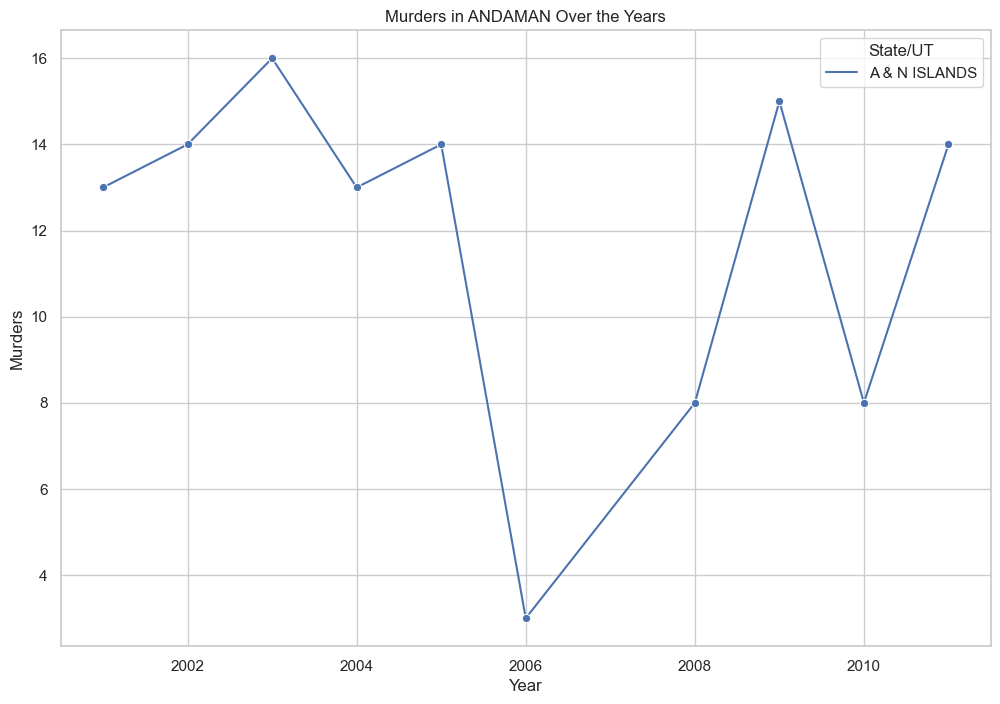

In [93]:
# Set the style for the plot
sns.set(style="whitegrid")

# Choose a specific district for visualization
selected_district = 'ANDAMAN'  # Replace 'YourDistrict' with the actual district name

# Filter the DataFrame for the selected district
district_data = result[result['DISTRICT'] == selected_district]

# Create a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='YEAR', y='MURDER', hue='STATE/UT', data=district_data, marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Murders')
plt.title(f'Murders in {selected_district} Over the Years')
plt.legend(title='State/UT')

# Show the plot
plt.show()

1]x axis represents year and y axis represents number of reported cases of murders.
2]above line plot showing count of murder cases in year(2001 to 2012)
3]showing data of only 'Andaman' district of 'Andaman & Nicobar Island'

In [102]:
andhra = result[(result['STATE/UT']=='ANDHRA PRADESH')]
andhra

,STATE/UT,YEAR,DISTRICT,MURDER
22,ANDHRA PRADESH,2011,CYBERABAD,213
23,ANDHRA PRADESH,2012,CYBERABAD,198
19,ANDHRA PRADESH,2008,CYBERABAD,197
17,ANDHRA PRADESH,2006,CYBERABAD,193
21,ANDHRA PRADESH,2010,CYBERABAD,187
20,ANDHRA PRADESH,2009,CYBERABAD,186
18,ANDHRA PRADESH,2007,CYBERABAD,186


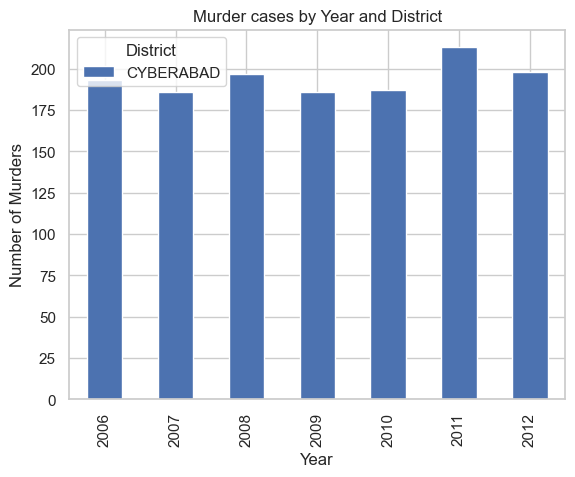

In [103]:
pivot_df = andhra.pivot(index='YEAR', columns='DISTRICT', values='MURDER')

# Plotting
pivot_df.plot(kind='bar', stacked=True)
plt.title('Murder cases by Year and District')
plt.xlabel('Year')
plt.ylabel('Number of Murders')
plt.legend(title='District', loc='upper left')
plt.show()

In [104]:
odi = result[(result['STATE/UT']=='ODISHA')]
odi

,STATE/UT,YEAR,DISTRICT,MURDER
308,ODISHA,2009,KEONJHAR,109
311,ODISHA,2012,KEONJHAR,97
307,ODISHA,2008,KEONJHAR,91
305,ODISHA,2006,KEONJHAR,84
310,ODISHA,2011,MAYURBHANJ,103
306,ODISHA,2007,MAYURBHANJ,98
309,ODISHA,2010,MAYURBHANJ,88
303,ODISHA,2004,MAYURBHANJ,77
300,ODISHA,2001,MAYURBHANJ,74
301,ODISHA,2002,SUNDARGARH,87


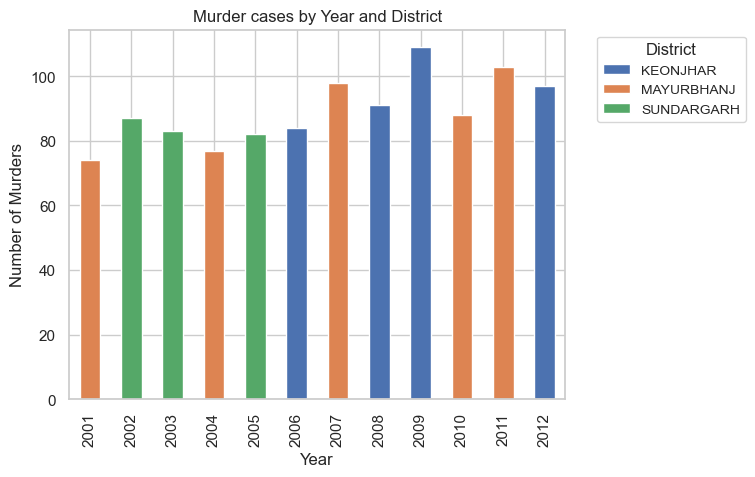

In [112]:
pivot_df = odi.pivot(index='YEAR', columns='DISTRICT', values='MURDER')

# Plotting
pivot_df.plot(kind='bar', stacked=True,)

plt.title('Murder cases by Year and District')
plt.xlabel('Year')
plt.ylabel('Number of Murders')
plt.legend(title='District', loc='upper left',bbox_to_anchor=(1.05, 1), fontsize='small')
plt.show()

In [115]:
up = result[(result['STATE/UT']=='UTTAR PRADESH')]
up

,STATE/UT,YEAR,DISTRICT,MURDER
384,UTTAR PRADESH,2001,MUZAFFARNAGAR,324
385,UTTAR PRADESH,2002,MUZAFFARNAGAR,287
387,UTTAR PRADESH,2004,MUZAFFARNAGAR,253
389,UTTAR PRADESH,2006,MUZAFFARNAGAR,230
390,UTTAR PRADESH,2007,MUZAFFARNAGAR,213


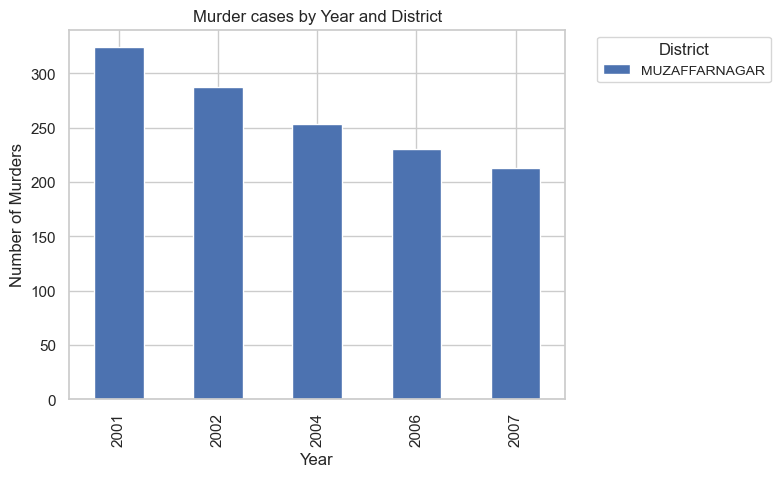

In [117]:
pivot_df = up.pivot(index='YEAR', columns='DISTRICT', values='MURDER')

# Plotting
pivot_df.plot(kind='bar', stacked=True,)

plt.title('Murder cases by Year and District')
plt.xlabel('Year')
plt.ylabel('Number of Murders')
plt.legend(title='District', loc='upper left',bbox_to_anchor=(1.05, 1), fontsize='small')
plt.show()

In [118]:
tn = result[(result['STATE/UT']=='TAMIL NADU')]
tn

,STATE/UT,YEAR,DISTRICT,MURDER
371,TAMIL NADU,2012,CHENNAI,180
370,TAMIL NADU,2011,CHENNAI,168
366,TAMIL NADU,2007,CHENNAI,145
365,TAMIL NADU,2006,CHENNAI,131
364,TAMIL NADU,2005,CHENNAI,123
369,TAMIL NADU,2010,CHENNAI,103
367,TAMIL NADU,2008,CHENNAI,100
368,TAMIL NADU,2009,CHENNAI,96
360,TAMIL NADU,2001,CHENNAI,91


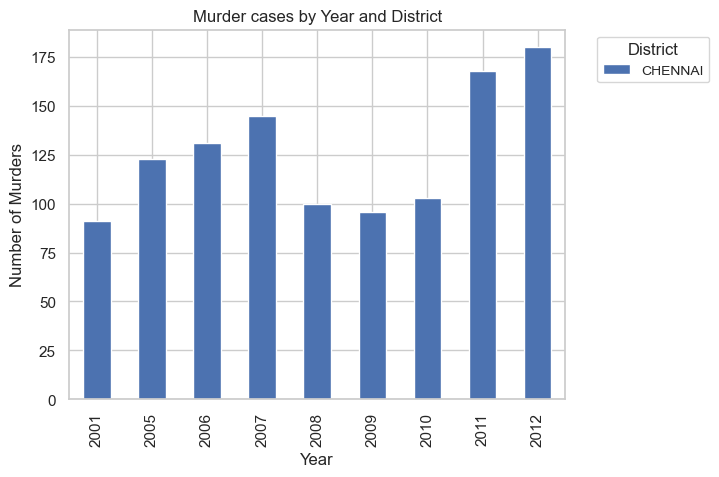

In [119]:
pivot_df = tn.pivot(index='YEAR', columns='DISTRICT', values='MURDER')

# Plotting
pivot_df.plot(kind='bar', stacked=True,)

plt.title('Murder cases by Year and District')
plt.xlabel('Year')
plt.ylabel('Number of Murders')
plt.legend(title='District', loc='upper left',bbox_to_anchor=(1.05, 1), fontsize='small')
plt.show()

In [120]:
mah = result[(result['STATE/UT']=='MAHARASHTRA')]
mah

,STATE/UT,YEAR,DISTRICT,MURDER
240,MAHARASHTRA,2001,MUMBAI,295
243,MAHARASHTRA,2004,MUMBAI,253
241,MAHARASHTRA,2002,MUMBAI,252
242,MAHARASHTRA,2003,MUMBAI,242
244,MAHARASHTRA,2005,MUMBAI,212
245,MAHARASHTRA,2006,MUMBAI COMMR.,239
246,MAHARASHTRA,2007,MUMBAI COMMR.,230
249,MAHARASHTRA,2010,MUMBAI COMMR.,228
248,MAHARASHTRA,2009,MUMBAI COMMR.,217
251,MAHARASHTRA,2012,MUMBAI COMMR.,215


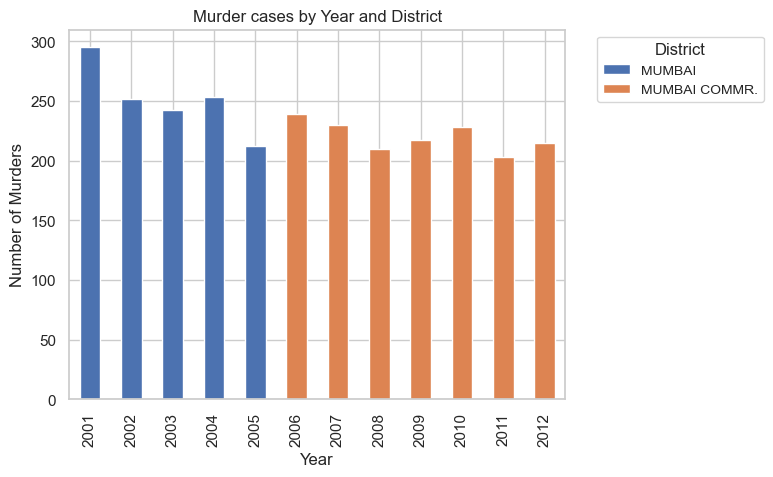

In [121]:
pivot_df = mah.pivot(index='YEAR', columns='DISTRICT', values='MURDER')

# Plotting
pivot_df.plot(kind='bar', stacked=True,)

plt.title('Murder cases by Year and District')
plt.xlabel('Year')
plt.ylabel('Number of Murders')
plt.legend(title='District', loc='upper left',bbox_to_anchor=(1.05, 1), fontsize='small')
plt.show()

In [122]:
ker = result[(result['STATE/UT']=='KERALA')]
ker

,STATE/UT,YEAR,DISTRICT,MURDER
206,KERALA,2003,PALAKKAD,52
209,KERALA,2006,PALAKKAD,44
213,KERALA,2010,PALAKKAD,42
214,KERALA,2011,PALAKKAD,41
212,KERALA,2009,PALAKKAD,36


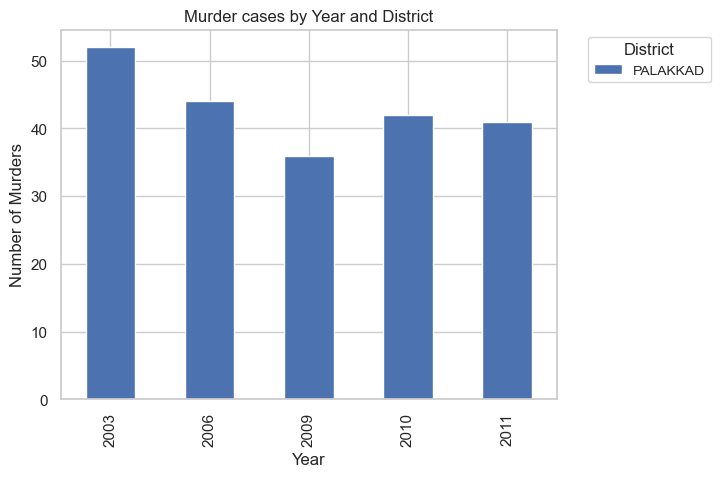

In [123]:
pivot_df = ker.pivot(index='YEAR', columns='DISTRICT', values='MURDER')

# Plotting
pivot_df.plot(kind='bar', stacked=True,)

plt.title('Murder cases by Year and District')
plt.xlabel('Year')
plt.ylabel('Number of Murders')
plt.legend(title='District', loc='upper left',bbox_to_anchor=(1.05, 1), fontsize='small')
plt.show()

I took some state to analyze district of that state which has number of murder cases by year and district.